# Explaining K-Means Clustering Algorithm


## JOSHITA DAS
## 21BRS1228
Referrence: https://www.geeksforgeeks.org/k-means-clustering-introduction/

Importing numpy for the use of arrays, matplotlib for visualization and sklearn.datasets to use make_blobs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


Creating a blob dataset. 
The dataset will have 500 data points with 2 features and 3 centres and a random state of 20.

When we vary the randome state and n_samples, we can observe the change in our outputs.

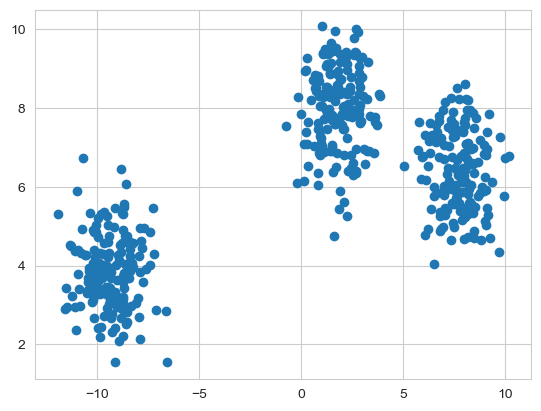

In [105]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 20)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


Defining k value as 3 and further defining k random centroids

In [106]:
k = 3

clusters = {}
np.random.seed(20)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters


{0: {'center': array([0.3525232 , 1.59085491]), 'points': []},
 1: {'center': array([1.56612292, 1.26334991]), 'points': []},
 2: {'center': array([-1.85644166,  0.76703033]), 'points': []}}

Plotting the centroids with our graph

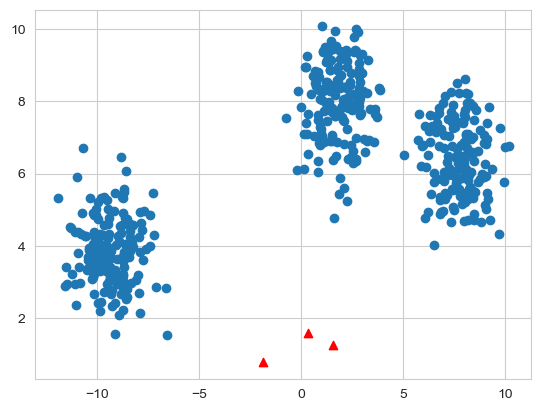

In [107]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()


Function to find the distance between 2 points

In [100]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))


Function *'assign_cluster'* to assign each data point with a cluster when the input is the datapoints and the centroids.

Fruntion *'update_clusters'* to update the centroids after defining the centroids.

In [101]:
#Implementing step 2 
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters


Predicting the clusters

In [102]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred


Using itterative approach to execute Step 2 and 3

In [108]:
clusters = assign_clusters(X,clusters)
for i in range(10):
    clusters = assign_clusters(X,clusters)
    clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)


plotting the final clusters

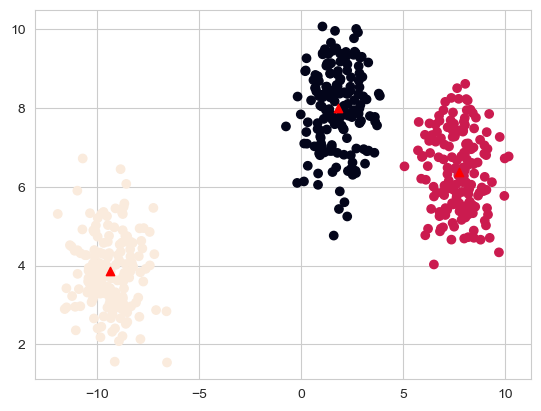

In [109]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()
